In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [374]:
dataset = pd.read_csv('../Dataset/netflix_titles.csv')

In [375]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1.) Exploratory Data Analysis

In [376]:
dataset.shape

(8807, 12)

In [377]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [378]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

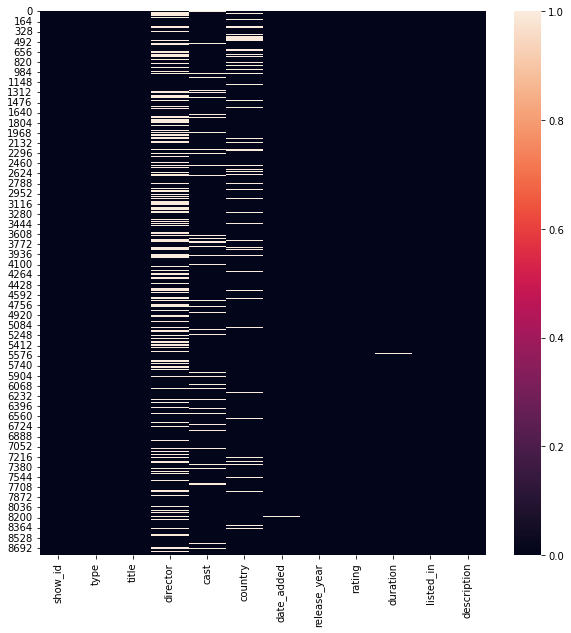

In [379]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.isnull())
plt.show()

In [380]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [381]:
dataset['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [382]:
dataset['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [383]:
dataset['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [384]:
dataset['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [385]:
for feature in ['type','rating','release_year']:
  plt.figure(figsize=(15,5))
  if feature == 'release_year':
    fig = px.histogram(dataset[feature], x=feature, title='Count of content added per year'.format(feature), nbins=100)
  else :
    fig = px.histogram(dataset[feature], x=feature, title='Histogram for {} feature'.format(feature))
  fig.show()
  

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

#### From the above plots we can conclude the following:
##### 1.) Number of movies > TV Shows.
##### 2.) The distribution of ratings that the rating with highest count is TV-MA.
##### 3.) 2018 is the year with maximum count of content created.

### Content created per month

In [386]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [387]:
def convert_to_date(x):
  if pd.isna(x):
    return None
  x = x.strip()
  d = datetime.strptime(x, '%B %d, %Y')
  #d = d.strftime('%Y-%m-%d')
  return int(d.month)

In [388]:
# Creating a month column from date_added
dataset['Month'] = dataset['date_added'].apply(convert_to_date)

In [389]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [390]:
content_added_perMonth = dataset.groupby(['Month']).count()['show_id']
content_added_perMonth = pd.DataFrame(content_added_perMonth).reset_index()
content_added_perMonth.rename(columns = {'show_id':'Count'}, inplace=True)

In [391]:
content_added_perMonth

,Month,Count
0,1.0,738
1,2.0,563
2,3.0,742
3,4.0,764
4,5.0,632
5,6.0,728
6,7.0,827
7,8.0,755
8,9.0,770
9,10.0,760


In [392]:
monthsDict = {
  1 : 'January',
  2 : 'February',
  3 : 'March',
  4 : 'April',
  5 : 'May',
  6 : 'June',
  7 : 'July',
  8 : 'August',
  9 : 'September',
  10 : 'October',
  11 : 'November',
  12 : 'December'
  }

In [393]:
content_added_perMonth['Month'] = content_added_perMonth['Month'].map(monthsDict)

<AxesSubplot:title={'center':'Content added per month'}, xlabel='Month', ylabel='Count'>

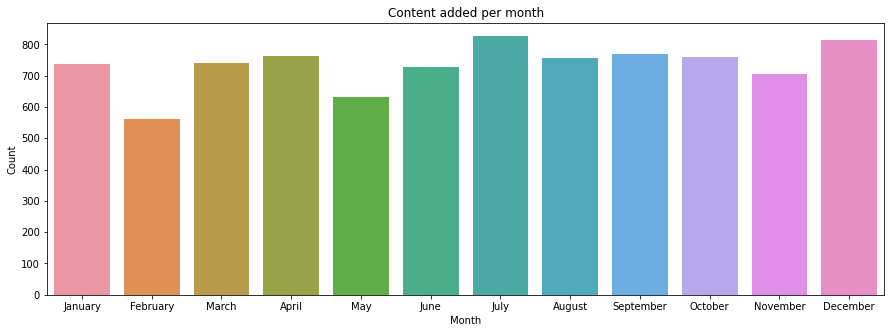

In [394]:
plt.figure(figsize=(15,5))
plt.title('Content added per month')
sns.barplot(x = 'Month', y='Count', data=content_added_perMonth)

### Ratings per Directors

In [395]:
ratings_per_director = dataset.groupby(['director','rating']).count()['show_id']

In [396]:
pd.DataFrame(ratings_per_director).rename(columns= {'show_id' : 'Count'})

Count
director            rating       
A. L. Vijay         TV-14       2
A. Raajdheep        TV-14       1
A. Salaam           TV-14       1
A.R. Murugadoss     TV-14       1
                    TV-MA       1
...                           ...
Çagan Irmak         TV-14       1
Ísold Uggadóttir    TV-14       1
Óskar Thór Axelsson TV-MA       1
Ömer Faruk Sorak    TV-MA       2
Şenol Sönmez        TV-14       2

[5150 rows x 1 columns]

### Content created per year

In [397]:
content_per_year = pd.DataFrame(dataset.groupby(['type','release_year']).count()['show_id'])
content_per_year.rename(columns= {'show_id' : 'Count'}, inplace=True)
content_per_year.reset_index()

,type,release_year,Count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Content added per year'}, xlabel='release_year', ylabel='Count'>

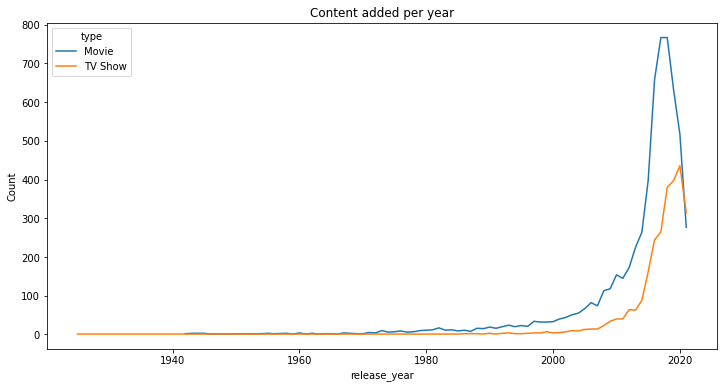

In [398]:
plt.figure(figsize=(12,6))
plt.title('Content added per year')
sns.lineplot('release_year', 'Count', data=content_per_year, hue='type')

#### We can see that number of movie added are more than that of TV Shows added

In [399]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [400]:
dataset_sortedby_release_year = dataset.sort_values(by=['release_year'])
dataset_sortedby_release_year.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,12.0
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,3.0
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,3.0
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,3.0
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,3.0


In [401]:
oldest_movies = dataset_sortedby_release_year[dataset_sortedby_release_year['type'] == 'Movie'][['title','release_year']]
oldest_TV_Shows = dataset_sortedby_release_year[dataset_sortedby_release_year['type'] == 'Movie'][['title','release_year']]

In [402]:
oldest_movies.head(10)

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945
7219,Know Your Enemy - Japan,1945


In [403]:
oldest_TV_Shows.head(10)

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945
7219,Know Your Enemy - Japan,1945


### Top 50 Contributing Countries

In [404]:
top_50_contributing_countries = dataset['country'].value_counts()
top_50_contributing_countries

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [406]:
top_50_contributing_countries = top_50_contributing_countries[:50].reset_index()

In [410]:
top_50_contributing_countries.rename(columns = {'index' : 'Country', 'country' : 'Count'}, inplace=True)

In [425]:
plt.figure(figsize=(15,10))
fig = px.bar(top_50_contributing_countries.sort_values(by=['Count']), y='Country', x='Count', width=1000, height=1000, title='Top 50 Contributing Countries')
fig.show()

<Figure size 1080x720 with 0 Axes>

### TV Shows with many seasons

In [443]:
shows_seasons = dataset[dataset['type'] == 'TV Show']['duration'].value_counts()

In [444]:
shows_seasons = shows_seasons.reset_index()

In [445]:
shows_seasons.rename(columns = {'index':'Seasons', 'duration' : 'Count'}, inplace=True)
shows_seasons

,Seasons,Count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


In [450]:
px.bar(shows_seasons.reset_index().sort_values(by=['Count']), x = 'Count', y= 'Seasons', title='Count of TV Shows with season counts', height=800, width=800)

### Top 50 Directors

In [451]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [480]:
top_50_directors = dataset.groupby(['director']).count()
top_50_directors.sort_values(by = ['show_id'],ascending=False, inplace= True)
top_50_directors.reset_index(inplace=True)
top_50_directors = top_50_directors[['director','show_id']]
top_50_directors

,director,show_id
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
...,...,...
4523,Jos Humphrey,1
4524,Jose Gomez,1
4525,Jose Javier Reyes,1
4526,"Joseduardo Giordano, Sergio Goyri Jr.",1


In [482]:
top_50_directors.rename(columns={'director': 'Director','show_id': 'Count'}, inplace= True)

In [483]:
top_50_directors

,Director,Count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
...,...,...
4523,Jos Humphrey,1
4524,Jose Gomez,1
4525,Jose Javier Reyes,1
4526,"Joseduardo Giordano, Sergio Goyri Jr.",1


In [486]:
px.bar(top_50_directors[:50], x = 'Director', y= 'Count' , title= 'Top 50 Directors by contribution')

### Analysing Cast

In [488]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [595]:
castNamesDict = dict()

In [519]:
def makeDict(casts):
  if pd.isna(casts):
    return
  else:
    namesList = casts.split(',') 
    #[castNamesDict[Name] += castNamesDict.get(Name, 0) + 1 for Name in namesList]
    for name in namesList:
      name = name.strip()
      castNamesDict[name] = castNamesDict.get(name, 0) + 1

In [520]:
dataset['cast'].apply(makeDict)

0       None
1       None
2       None
3       None
4       None
        ... 
8802    None
8803    None
8804    None
8805    None
8806    None
Name: cast, Length: 8807, dtype: object

In [532]:
castNamesDict

{'Ama Qamata': 1,
 'Khosi Ngema': 1,
 'Gail Mabalane': 1,
 'Thabang Molaba': 2,
 'Dillon Windvogel': 1,
 'Natasha Thahane': 1,
 'Arno Greeff': 1,
 'Xolile Tshabalala': 1,
 'Getmore Sithole': 1,
 'Cindy Mahlangu': 2,
 'Ryle De Morny': 1,
 'Greteli Fincham': 1,
 'Sello Maake Ka-Ncube': 1,
 'Odwa Gwanya': 1,
 'Mekaila Mathys': 1,
 'Sandi Schultz': 1,
 'Duane Williams': 1,
 'Shamilla Miller': 1,
 'Patrick Mofokeng': 2,
 'Sami Bouajila': 3,
 'Tracy Gotoas': 1,
 'Samuel Jouy': 3,
 'Nabiha Akkari': 1,
 'Sofia Lesaffre': 2,
 'Salim Kechiouche': 2,
 'Noureddine Farihi': 1,
 'Geert Van Rampelberg': 1,
 'Bakary Diombera': 2,
 'Mayur More': 4,
 'Jitendra Kumar': 2,
 'Ranjan Raj': 1,
 'Alam Khan': 2,
 'Ahsaas Channa': 2,
 'Revathi Pillai': 2,
 'Urvi Singh': 1,
 'Arun Kumar': 2,
 'Kate Siegel': 3,
 'Zach Gilford': 3,
 'Hamish Linklater': 3,
 'Henry Thomas': 7,
 'Kristin Lehman': 2,
 'Samantha Sloyan': 2,
 'Igby Rigney': 1,
 'Rahul Kohli': 4,
 'Annarah Cymone': 1,
 'Annabeth Gish': 7,
 'Alex Essoe': 

In [571]:
castNamesTuplesList = list(castNamesDict.items())

In [573]:
castNamesTuplesList

[('Anupam Kher', 43),
 ('Shah Rukh Khan', 35),
 ('Julie Tejwani', 33),
 ('Naseeruddin Shah', 32),
 ('Takahiro Sakurai', 32),
 ('Rupa Bhimani', 31),
 ('Akshay Kumar', 30),
 ('Om Puri', 30),
 ('Yuki Kaji', 29),
 ('Amitabh Bachchan', 28),
 ('Paresh Rawal', 28),
 ('Boman Irani', 27),
 ('Rajesh Kava', 26),
 ('Vincent Tong', 26),
 ('Andrea Libman', 25),
 ('Kareena Kapoor', 25),
 ('Samuel L. Jackson', 24),
 ('John Cleese', 24),
 ('Jigna Bhardwaj', 23),
 ('Fred Tatasciore', 23),
 ('Tara Strong', 23),
 ('Daisuke Ono', 22),
 ('Junichi Suwabe', 21),
 ('Ajay Devgn', 21),
 ('Ashleigh Ball', 21),
 ('Kay Kay Menon', 21),
 ('Nicolas Cage', 21),
 ('Nawazuddin Siddiqui', 21),
 ('Adam Sandler', 20),
 ('David Attenborough', 20),
 ('Salman Khan', 20),
 ('David Spade', 19),
 ('Yuichi Nakamura', 19),
 ('Erin Fitzgerald', 19),
 ('Mamoru Miyano', 19),
 ('Morgan Freeman', 19),
 ('James Franco', 19),
 ('Seth Rogen', 19),
 ('Ai Kayano', 19),
 ('Fred Armisen', 19),
 ('Gulshan Grover', 19),
 ('Vatsal Dubey', 18),
 

In [572]:
castNamesTuplesList.sort(key = lambda x : x[1], reverse=True)
top_50_casts = [record[0] for record in castNamesTuplesList[:50]]

In [574]:
top_50_casts

['Anupam Kher',
 'Shah Rukh Khan',
 'Julie Tejwani',
 'Naseeruddin Shah',
 'Takahiro Sakurai',
 'Rupa Bhimani',
 'Akshay Kumar',
 'Om Puri',
 'Yuki Kaji',
 'Amitabh Bachchan',
 'Paresh Rawal',
 'Boman Irani',
 'Rajesh Kava',
 'Vincent Tong',
 'Andrea Libman',
 'Kareena Kapoor',
 'Samuel L. Jackson',
 'John Cleese',
 'Jigna Bhardwaj',
 'Fred Tatasciore',
 'Tara Strong',
 'Daisuke Ono',
 'Junichi Suwabe',
 'Ajay Devgn',
 'Ashleigh Ball',
 'Kay Kay Menon',
 'Nicolas Cage',
 'Nawazuddin Siddiqui',
 'Adam Sandler',
 'David Attenborough',
 'Salman Khan',
 'David Spade',
 'Yuichi Nakamura',
 'Erin Fitzgerald',
 'Mamoru Miyano',
 'Morgan Freeman',
 'James Franco',
 'Seth Rogen',
 'Ai Kayano',
 'Fred Armisen',
 'Gulshan Grover',
 'Vatsal Dubey',
 'Rajesh Sharma',
 'Fortune Feimster',
 'Diana Kaarina',
 'Yashpal Sharma',
 'Kana Hanazawa',
 'Laura Bailey',
 'Anil Kapoor',
 'Debi Derryberry']

In [586]:
casts_appearance_dataframe = pd.DataFrame(castNamesTuplesList, columns=['Cast Name','Appearances'])

In [587]:
casts_appearance_dataframe

,Cast Name,Appearances
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
...,...,...
36434,Ryan Newman,1
36435,Raaghav Chanana,1
36436,Malkeet Rauni,1
36437,Anita Shabdish,1


In [591]:
fig = px.bar(casts_appearance_dataframe[:50].sort_values(by=['Appearances']), x='Appearances', y = 'Cast Name', height = 1000, title='Top 50 Actor/Actress based on their appearance')
fig.show()

In [562]:
# Sorting Our castNamesDict - Second approach
#sortedValues = list(castNamesDict.values())
#sortedValues.sort(reverse=True)
#sortedCastNamesDict = dict()
#for value in sortedValues:
#  for name in list(castNamesDict.keys()):
#    if castNamesDict[name] == value :
#      sortedCastNamesDict[name] = value

### Popular Genres in TV Shows

In [594]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [598]:
TVShowsGenreDict = dict()

In [599]:
def makeDict(listed_in):
  if pd.isna(listed_in):
    return
  else:
    genreList = listed_in.split(',') 
    #[castNamesDict[Name] += castNamesDict.get(Name, 0) + 1 for Name in namesList]
    for genre in genreList:
      genre = genre.strip()
      TVShowsGenreDict[genre] = TVShowsGenreDict.get(genre, 0) + 1

In [600]:
dataset[dataset['type'] == 'TV Show']['listed_in'].apply(makeDict)

1       None
2       None
3       None
4       None
5       None
        ... 
8795    None
8796    None
8797    None
8800    None
8803    None
Name: listed_in, Length: 2676, dtype: object

In [601]:
TVShowsGenreDict

{'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Mysteries': 98,
 'Crime TV Shows': 470,
 'TV Action & Adventure': 168,
 'Docuseries': 395,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 581,
 'TV Horror': 75,
 'British TV Shows': 253,
 'Spanish-Language TV Shows': 174,
 'TV Thrillers': 57,
 "Kids' TV": 451,
 'TV Sci-Fi & Fantasy': 84,
 'Anime Series': 176,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'TV Shows': 16,
 'Stand-Up Comedy & Talk Shows': 56,
 'Classic & Cult TV': 28}

In [602]:
TVShowsTuplesList = list(TVShowsGenreDict.items())
TVShowsTuplesList

[('International TV Shows', 1351),
 ('TV Dramas', 763),
 ('TV Mysteries', 98),
 ('Crime TV Shows', 470),
 ('TV Action & Adventure', 168),
 ('Docuseries', 395),
 ('Reality TV', 255),
 ('Romantic TV Shows', 370),
 ('TV Comedies', 581),
 ('TV Horror', 75),
 ('British TV Shows', 253),
 ('Spanish-Language TV Shows', 174),
 ('TV Thrillers', 57),
 ("Kids' TV", 451),
 ('TV Sci-Fi & Fantasy', 84),
 ('Anime Series', 176),
 ('Korean TV Shows', 151),
 ('Science & Nature TV', 92),
 ('Teen TV Shows', 69),
 ('TV Shows', 16),
 ('Stand-Up Comedy & Talk Shows', 56),
 ('Classic & Cult TV', 28)]

In [609]:
TVShowsTuplesList.sort(key = lambda x : x[1], reverse=True)
TVShowsTuplesList

[('International TV Shows', 1351),
 ('TV Dramas', 763),
 ('TV Comedies', 581),
 ('Crime TV Shows', 470),
 ("Kids' TV", 451),
 ('Docuseries', 395),
 ('Romantic TV Shows', 370),
 ('Reality TV', 255),
 ('British TV Shows', 253),
 ('Anime Series', 176),
 ('Spanish-Language TV Shows', 174),
 ('TV Action & Adventure', 168),
 ('Korean TV Shows', 151),
 ('TV Mysteries', 98),
 ('Science & Nature TV', 92),
 ('TV Sci-Fi & Fantasy', 84),
 ('TV Horror', 75),
 ('Teen TV Shows', 69),
 ('TV Thrillers', 57),
 ('Stand-Up Comedy & Talk Shows', 56),
 ('Classic & Cult TV', 28),
 ('TV Shows', 16)]

In [628]:
TVShowsDataFrame = pd.DataFrame(TVShowsTuplesList, columns=['Genre','Number of TV Shows'])
TVShowsDataFrame

,Genre,Number of TV Shows
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


In [629]:
fig = px.bar(TVShowsDataFrame.sort_values(by=['Number of TV Shows']), x='Number of TV Shows', y='Genre', title='Genre sorted by the number of TV Shows', height=600)
fig.show()

### Popular Genres in Movies

In [620]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [621]:
MoviesGenreDict = dict()

In [622]:
def makeDict(listed_in):
  if pd.isna(listed_in):
    return
  else:
    genreList = listed_in.split(',') 
    #[castNamesDict[Name] += castNamesDict.get(Name, 0) + 1 for Name in namesList]
    for genre in genreList:
      genre = genre.strip()
      MoviesGenreDict[genre] = MoviesGenreDict.get(genre, 0) + 1

In [623]:
dataset[dataset['type'] == 'Movie']['listed_in'].apply(makeDict)

0       None
6       None
7       None
9       None
12      None
        ... 
8801    None
8802    None
8804    None
8805    None
8806    None
Name: listed_in, Length: 6131, dtype: object

In [624]:
MoviesGenreDict

{'Documentaries': 869,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'Comedies': 1674,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'Action & Adventure': 859,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Cult Movies': 71,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 57}

In [625]:
MoviesTuplesList = list(MoviesGenreDict.items())
MoviesTuplesList

[('Documentaries', 869),
 ('Children & Family Movies', 641),
 ('Dramas', 2427),
 ('Independent Movies', 756),
 ('International Movies', 2752),
 ('Comedies', 1674),
 ('Thrillers', 577),
 ('Romantic Movies', 616),
 ('Music & Musicals', 375),
 ('Horror Movies', 357),
 ('Sci-Fi & Fantasy', 243),
 ('Action & Adventure', 859),
 ('Classic Movies', 116),
 ('Anime Features', 71),
 ('Sports Movies', 219),
 ('Cult Movies', 71),
 ('Faith & Spirituality', 65),
 ('LGBTQ Movies', 102),
 ('Stand-Up Comedy', 343),
 ('Movies', 57)]

In [ ]:
MoviesTuplesList.sort(key = lambda x : x[1], reverse=True)
MoviesTuplesList

In [627]:
MoviesDataFrame = pd.DataFrame(MoviesGenreDict, columns=['Genre','Number of Movies'])
MoviesDataFrame

,Genre,Number of Movies
0,Documentaries,869
1,Children & Family Movies,641
2,Dramas,2427
3,Independent Movies,756
4,International Movies,2752
5,Comedies,1674
6,Thrillers,577
7,Romantic Movies,616
8,Music & Musicals,375
9,Horror Movies,357


In [630]:
fig = px.bar(MoviesDataFrame.sort_values(by=['Number of Movies']), x='Number of Movies', y='Genre', title='Genre sorted by the number of Movies', height=600)
fig.show()